# Keras - Fashion-MNIST

* Chargez le jeu de données Feshion-MNIST fourni avec Keras.
* Afficher les 10 premières images
* Entraînez un réseau de neurones pour atteindre une accuracy sur les données de test > 87%
* Afficher les 10 premières images avec leur type prédit (pull, dress, etc)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8)
%config InlineBackend.figure_format = 'retina'

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [2]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['acc']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_acc' in history.history:
        val_acc = history.history['val_acc']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()


In [3]:
print('Train images shape: ' + str(x_train.shape))
print('Train targets shape: ' + str(y_train.shape))
print('Targets: ' + str(y_train))

Train images shape: (60000, 28, 28)
Train targets shape: (60000,)
Targets: [9 0 0 ..., 3 0 5]


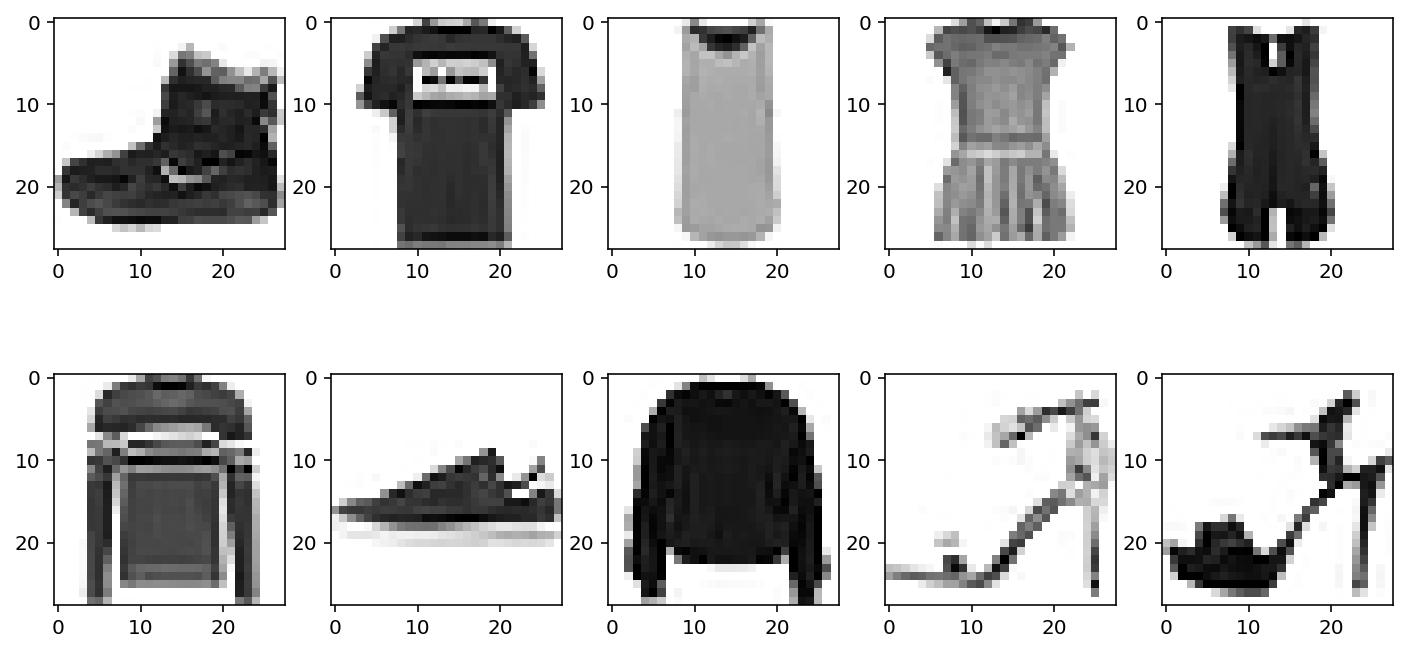

In [4]:
plt.figure(figsize=(12, 6))
for i in range(10):
    digit = x_train[i]
    fig = plt.subplot(2, 5, i + 1)
    plt.imshow(digit, cmap=plt.cm.binary)

In [5]:
# Reshape images data into a (number of samples, 28x28) matrix
train_images = x_train.reshape((60000, 28 * 28))
test_images = x_test.reshape((10000, 28 * 28))

# Change pixel values from (0, 255) to (0, 1)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert targets from vectors to binary matrixes
train_targets = to_categorical(y_train)
test_targets = to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Describe the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.7871 - acc: 0.7395
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.5040 - acc: 0.8266
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.4632 - acc: 0.8407
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.4407 - acc: 0.8462
Epoch 5/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.4259 - acc: 0.8519


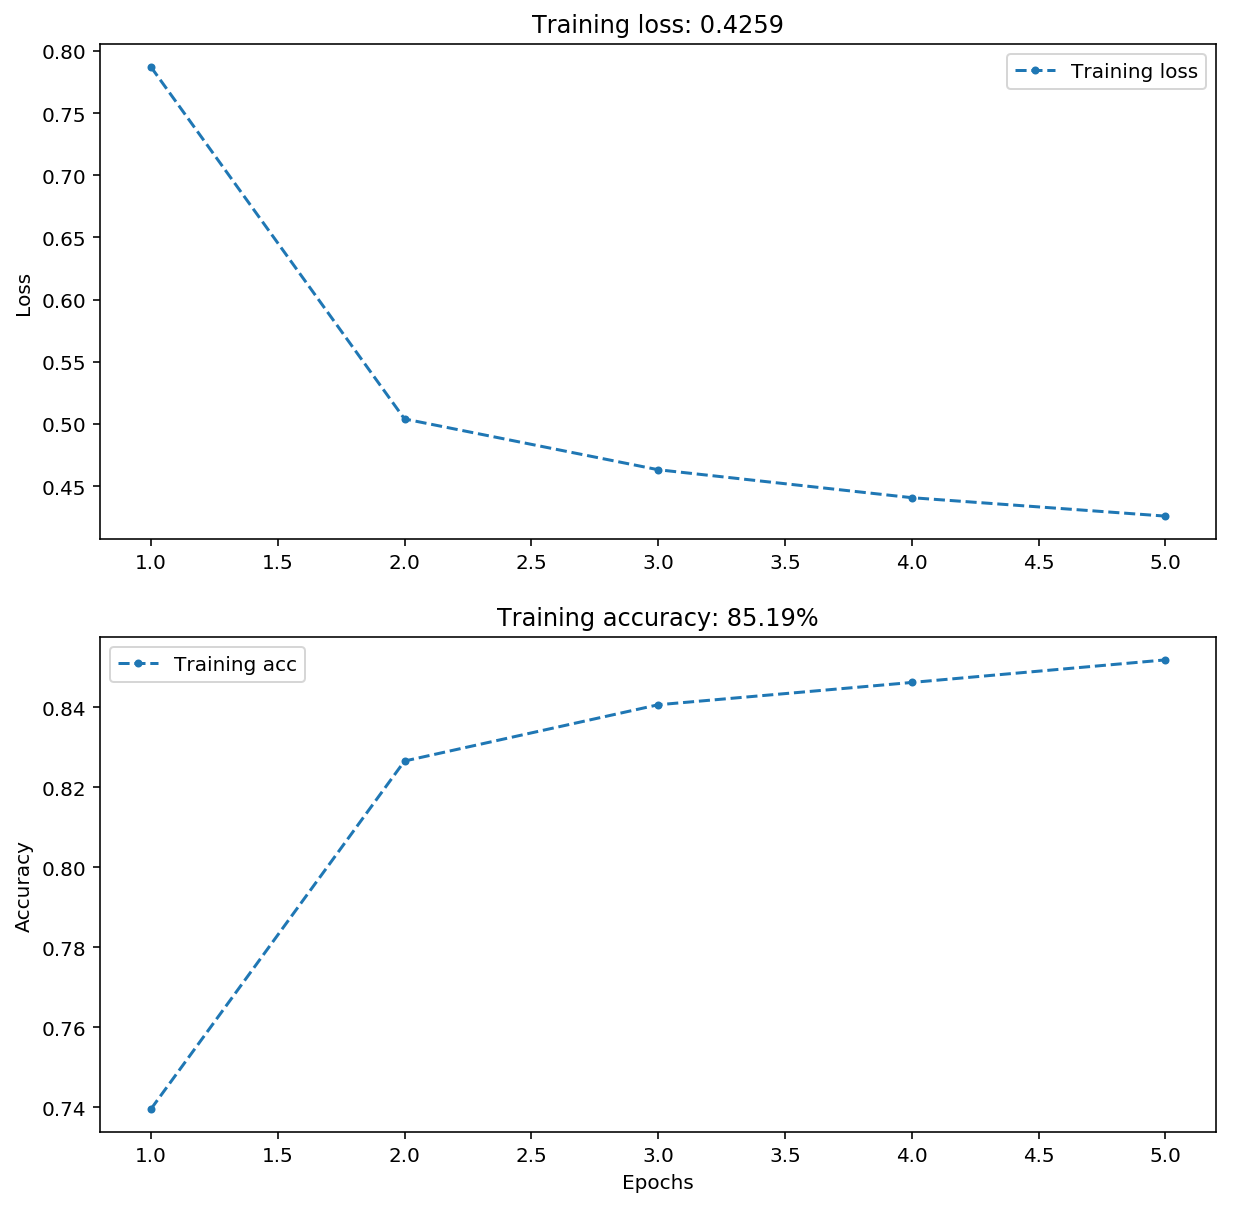

In [7]:
model.compile('rmsprop', 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_targets,
                    epochs=5, batch_size=128)
plot_loss_acc(history)

In [8]:

# Evaluate the model on test data
loss, acc = model.evaluate(test_images, test_targets, verbose=0)

print('Test accuracy: ' + str(acc * 100) + '%')

Test accuracy: 83.51%


In [9]:
# Plot the first 10 digits with associated predictions
tableau_correspondance=np.array["tshirt"]
plt.figure(figsize=(12, 6))
for i in range(10):
    digit = x_train[i]
    prediction = np.argmax(model.predict(
        digit.reshape((1, 28 * 28))))
    fig = plt.subplot(2, 5, i + 1)
    plt.title('It\'s a {:d}'.format(prediction), fontsize=30)
    plt.imshow(digit, cmap=plt.cm.binary)


TypeError: 'builtin_function_or_method' object is not subscriptable